In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Loading the dat
file_path = "source/WA_Fn-UseC_-Telco-Customer-Churn.csv"
try:
    customer_df = pd.read_csv(file_path)
except FileNotFoundError:
    print("error finding the file")
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
customer_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [42]:
customer_df[customer_df.select_dtypes(exclude="object").columns.tolist()].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [43]:
customer_df["TotalCharges"] = pd.to_numeric(customer_df["TotalCharges"], errors = "coerce")
customer_df["TotalCharges"] = customer_df["TotalCharges"].fillna(customer_df["TotalCharges"].median())
print(customer_df["TotalCharges"].isnull().sum())

0


,Churn,churn_rate_%
,count,
Churn,,
No,5174.0,73.46
Yes,1869.0,26.54


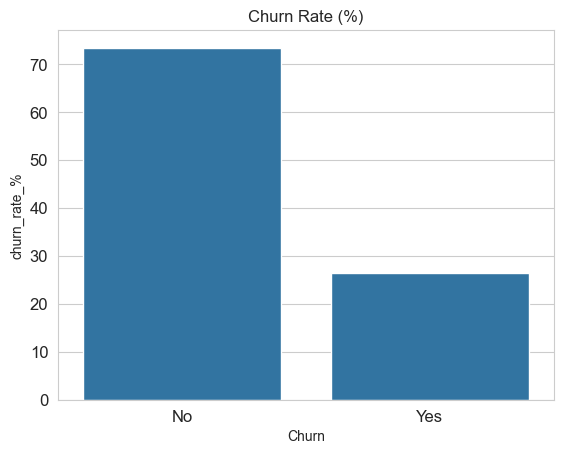

In [44]:
Churn = customer_df.groupby("Churn").agg({"Churn":["count"]})
Churn["churn_rate_%"] = Churn["Churn"]["count"]/customer_df["Churn"].count() *100
Churn = Churn.astype("float").round(2)
sns.set_style("whitegrid")
sns.barplot(data = Churn, y = "churn_rate_%", x = Churn.index)
plt.title("Churn Rate (%)")
plt.tick_params(axis = "both", labelsize = 12)
Churn

In [89]:
def hist(col):
    sns.histplot(data = customer_df, x = col, kde = True, hue= "Churn")
    plt.title(f"{col} Distribution by Churn Status")
    plt.ylabel(ylabel="Count", fontsize=12)
    plt.xlabel(xlabel=col, fontsize=12)


In [90]:
def count(x, hue="Churn"):
    plt.figure(figsize=(8,6))
    sns.countplot(data=customer_df, x=x, hue=hue)
    plt.title(f"Churn Distribution by {x}")
    plt.ylabel(ylabel="Count", fontsize=12)
    plt.xlabel(xlabel=f"{x}", fontsize=12)

In [91]:
def box(col):
    plt.figure(figsize=(8,6))
    sns.boxplot(data=customer_df, x=col)
    plt.title(f"Box plot for {col}")
    plt.ylabel(ylabel="Count", fontsize=12)
    plt.xlabel(xlabel=f"{col}", fontsize=12)

In [88]:
gender_dist = pd.concat([
    customer_df[(customer_df["Churn"] == "Yes")].groupby("gender").agg({"gender":["value_counts"]}),
    customer_df[(customer_df["Churn"] == "No")].groupby("gender").agg({"gender":["value_counts"]})
], axis=1)
gender_dist.columns = (["Yes_values", "No_values"])
gender_dist["Churn_rate(%)"] = ((gender_dist["Yes_values"] / (gender_dist["Yes_values"] + gender_dist["No_values"]))*100).astype("float").round(2)
gender_dist

,Yes_values,No_values,Churn_rate(%)
gender,,,
Female,939,2549,26.92
Male,930,2625,26.16


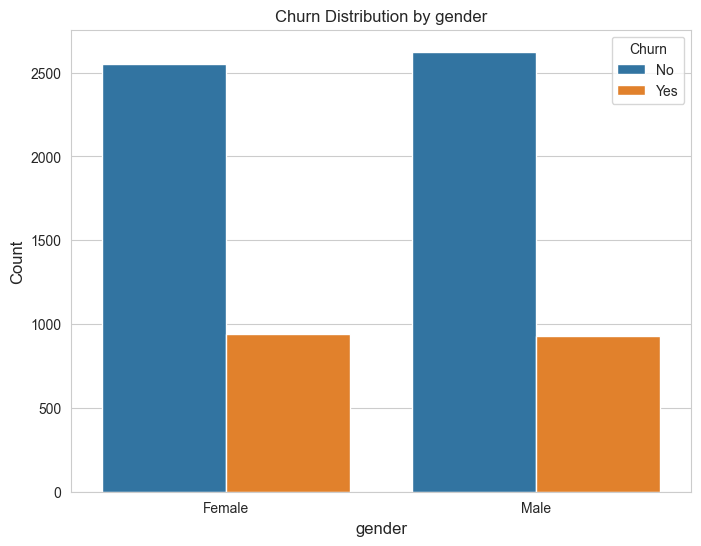

In [95]:
count("gender")

Text(0.5, 0, 'Gender')

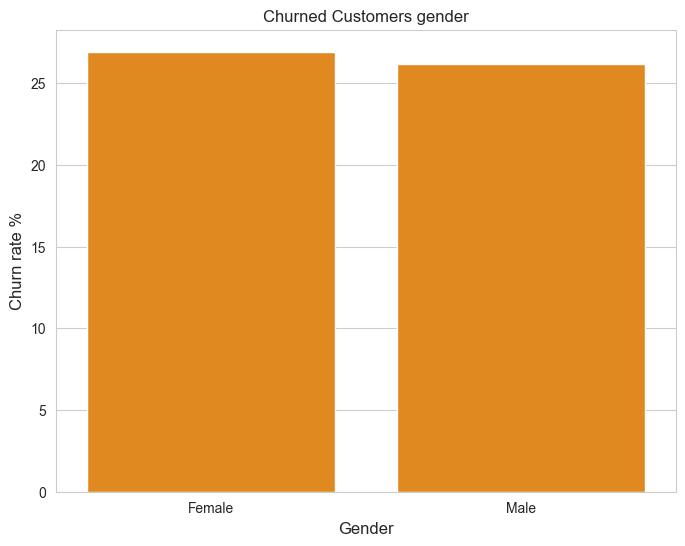

In [94]:
plt.figure(figsize=(8,6))
sns.barplot(data=gender_dist["Churn_rate(%)"], color="darkorange")
plt.title("Churned Customers gender")
plt.ylabel(ylabel="Churn rate %", fontsize=12)
plt.xlabel(xlabel="Gender", fontsize=12)

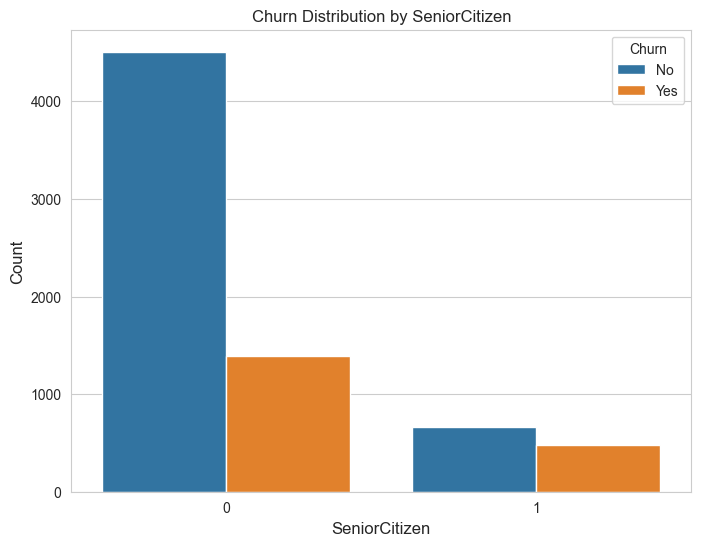

In [96]:
count("SeniorCitizen")

SeniorCitizen
0    83.79
1    16.21
Name: count, dtype: float64

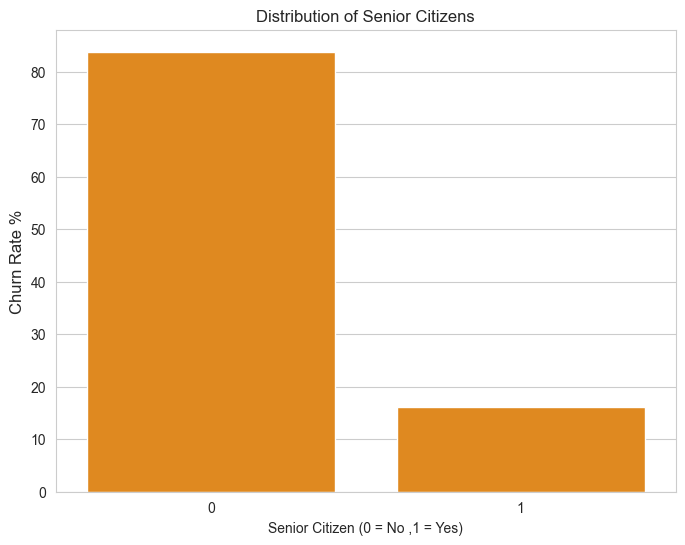

In [102]:
sc = (customer_df["SeniorCitizen"].value_counts()/customer_df["SeniorCitizen"].count()*100).astype("float").round(2)
plt.figure(figsize=(8,6))
sns.barplot(data=sc, color="darkorange")
plt.title("Distribution of Senior Citizens")
plt.ylabel(ylabel="Churn Rate %", fontsize=12)
plt.xlabel(xlabel="Senior Citizen (0 = No ,1 = Yes)")
sc

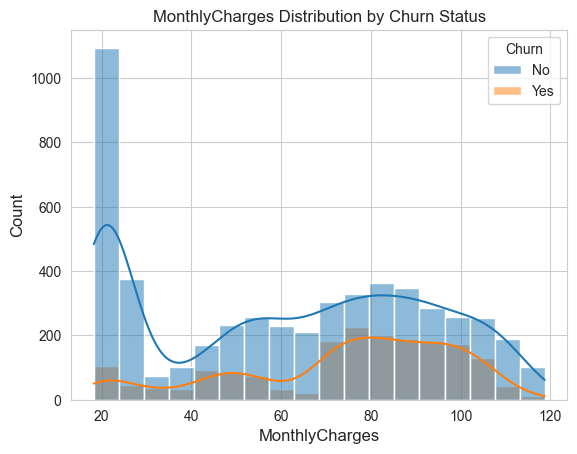

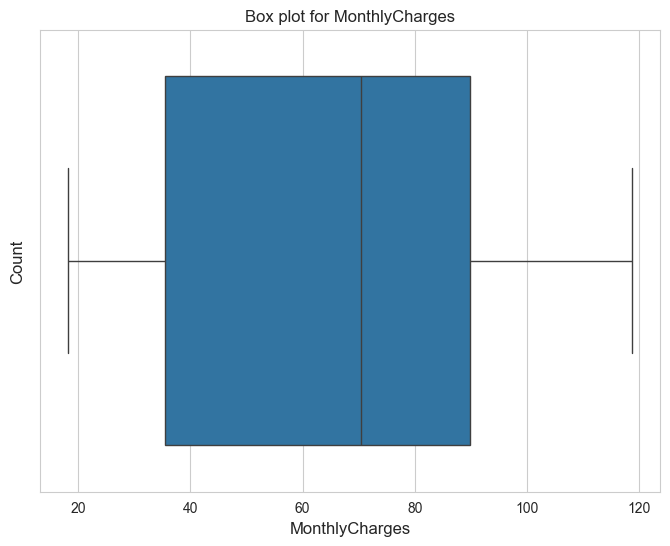

In [72]:
hist("MonthlyCharges")
box("MonthlyCharges")

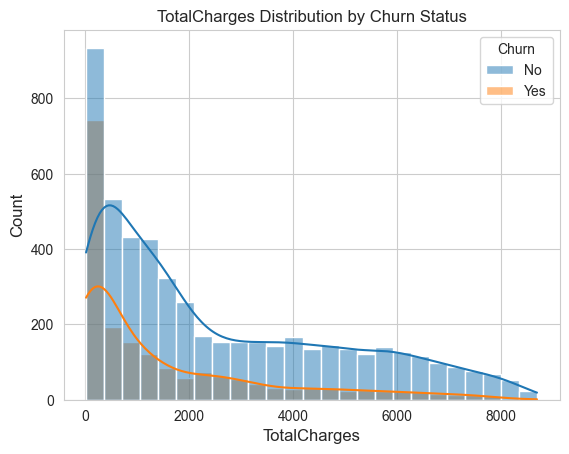

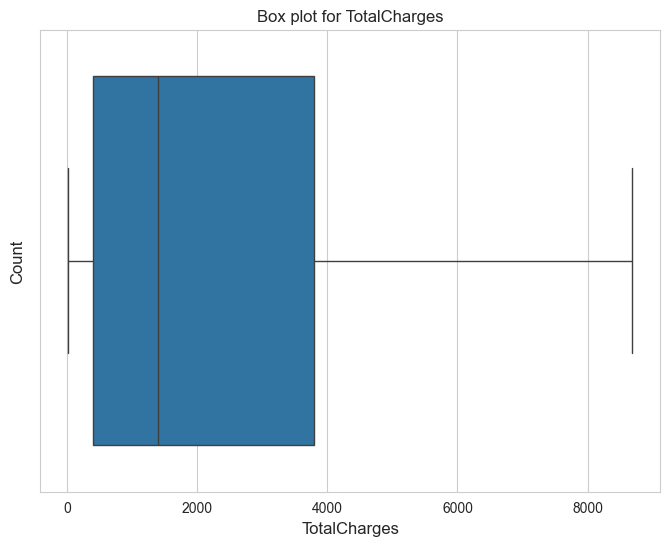

In [73]:
hist("TotalCharges")
box("TotalCharges")

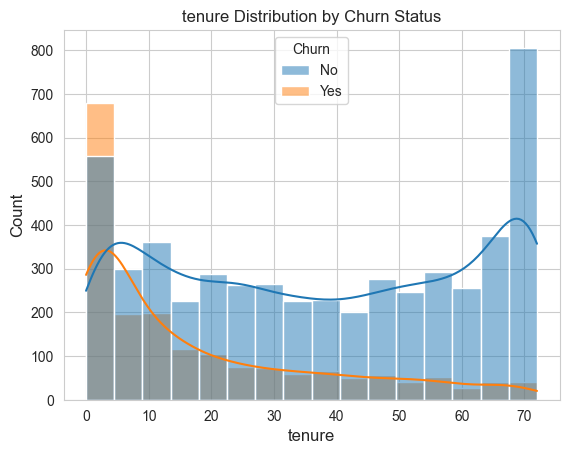

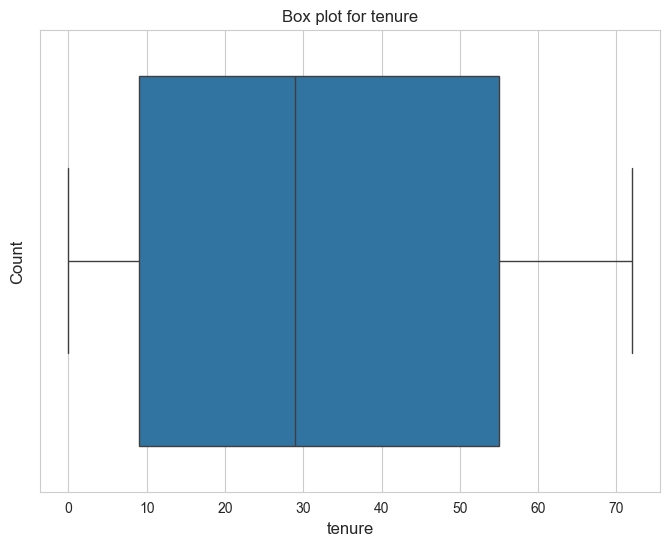

In [74]:
hist("tenure")
box("tenure")

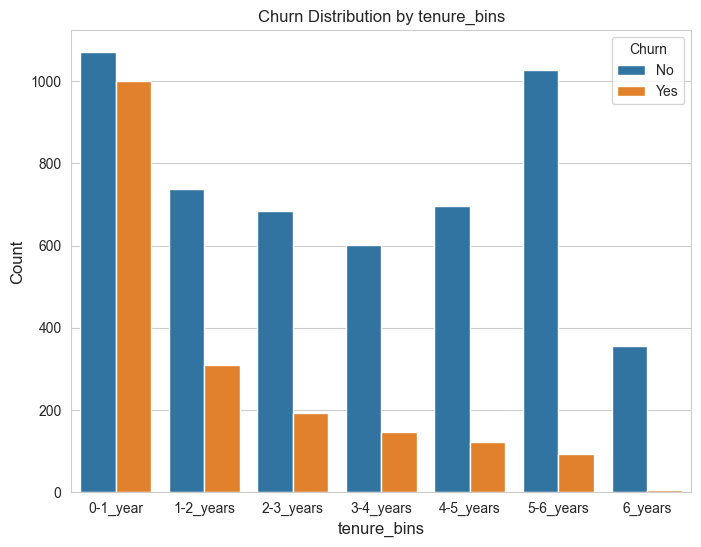

In [54]:
bins = [0, 12, 24, 36, 48, 60, 72, 84]#convert months to years
labels = ["0-1_year", "1-2_years", "2-3_years", "3-4_years", "4-5_years", "5-6_years", "6_years"]
tenure_bins = pd.cut(customer_df["tenure"], bins = bins, labels = labels, right = False)
customer_df["tenure_bins"] = tenure_bins
count("tenure_bins")

Text(0.5, 0, 'Tenure bins(Years)')

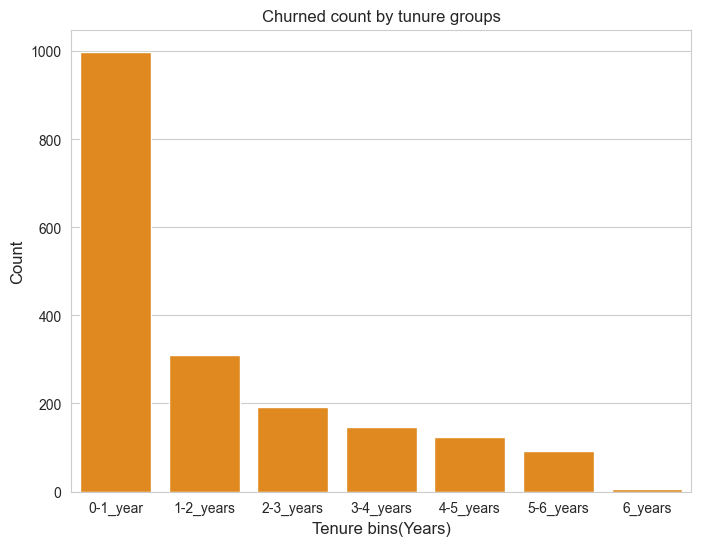

In [81]:
plt.figure(figsize=(8,6))
sns.barplot(data = customer_df[(customer_df["Churn"] == "Yes")].tenure_bins.value_counts(), color="darkorange")
plt.title("Churned count by tunure groups")
plt.ylabel(ylabel="Count", fontsize=12)
plt.xlabel(xlabel="Tenure bins(Years)", fontsize=12)

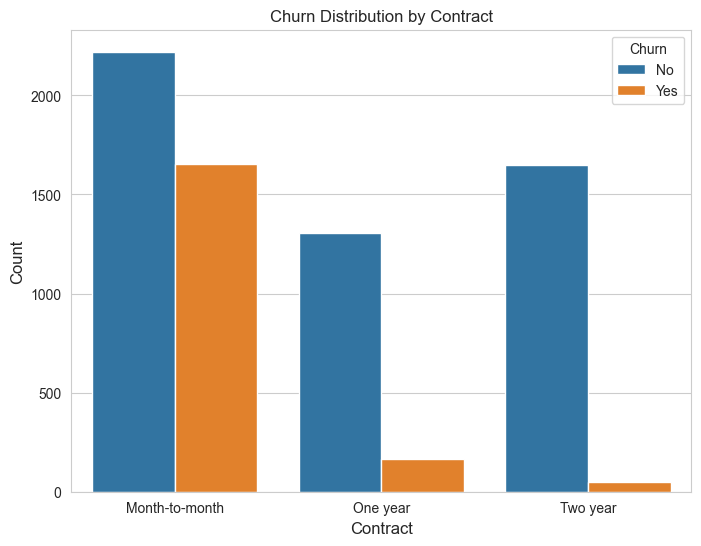

In [56]:
count("Contract")

Text(0.5, 0, 'Contract types')

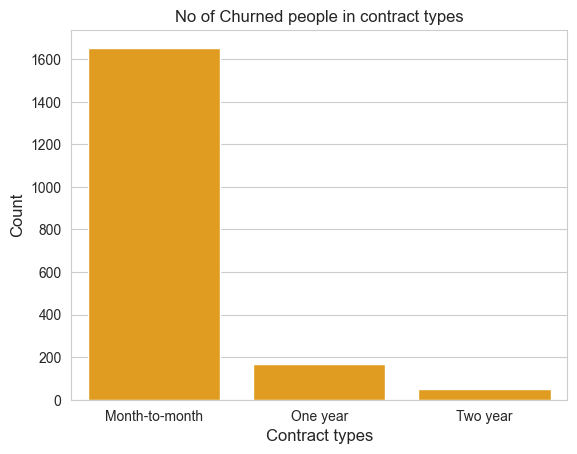

In [57]:
contract = customer_df[(customer_df["Churn"] == "Yes")].Contract.value_counts()
sns.barplot(data=contract, color="orange")
plt.title("No of Churned people in contract types")
plt.ylabel(ylabel="Count", fontsize=12)
plt.xlabel(xlabel="Contract types", fontsize=12)

Churn
                                value_counts
PaymentMethod             Churn             
Bank transfer (automatic) No            1286
                          Yes            258
Credit card (automatic)   No            1290
                          Yes            232
Electronic check          No            1294
                          Yes           1071
Mailed check              No            1304
                          Yes            308

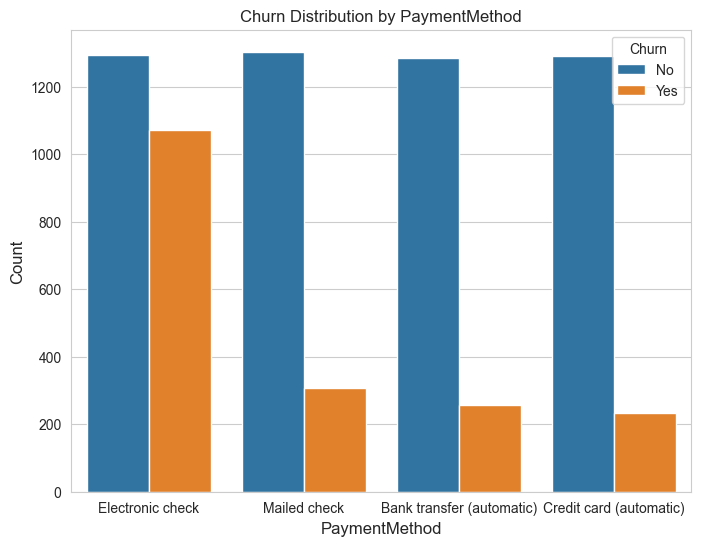

In [103]:
count("PaymentMethod")
customer_df.groupby("PaymentMethod").agg({("Churn"):["value_counts"]})

In [59]:
payment_method_df = pd.concat([
    customer_df[(customer_df["Churn"] == "Yes")].groupby("PaymentMethod").agg({"PaymentMethod":["value_counts"]}),
    customer_df[(customer_df["Churn"] == "No")].groupby("PaymentMethod").agg({"PaymentMethod":["value_counts"]})
], axis=1)
payment_method_df.columns = ["yes_values", "no_values"]
payment_method_df["Churn_rate(%)"] = ((payment_method_df["yes_values"]/(payment_method_df["yes_values"] + payment_method_df["no_values"]))*100).astype("float").round(2)
payment_method_df

,yes_values,no_values,Churn_rate(%)
PaymentMethod,,,
Bank transfer (automatic),258,1286,16.71
Credit card (automatic),232,1290,15.24
Electronic check,1071,1294,45.29
Mailed check,308,1304,19.11


Text(0.5, 0, 'Payment Methods')

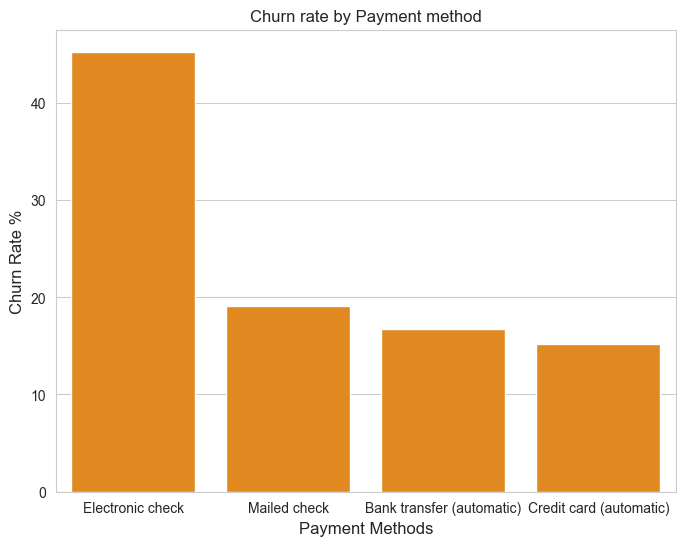

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(data=payment_method_df["Churn_rate(%)"].sort_values(ascending=False) , color="darkorange")
plt.title("Churn rate by Payment method")
plt.ylabel(ylabel="Churn Rate %", fontsize=12)
plt.xlabel(xlabel="Payment Methods", fontsize=12)


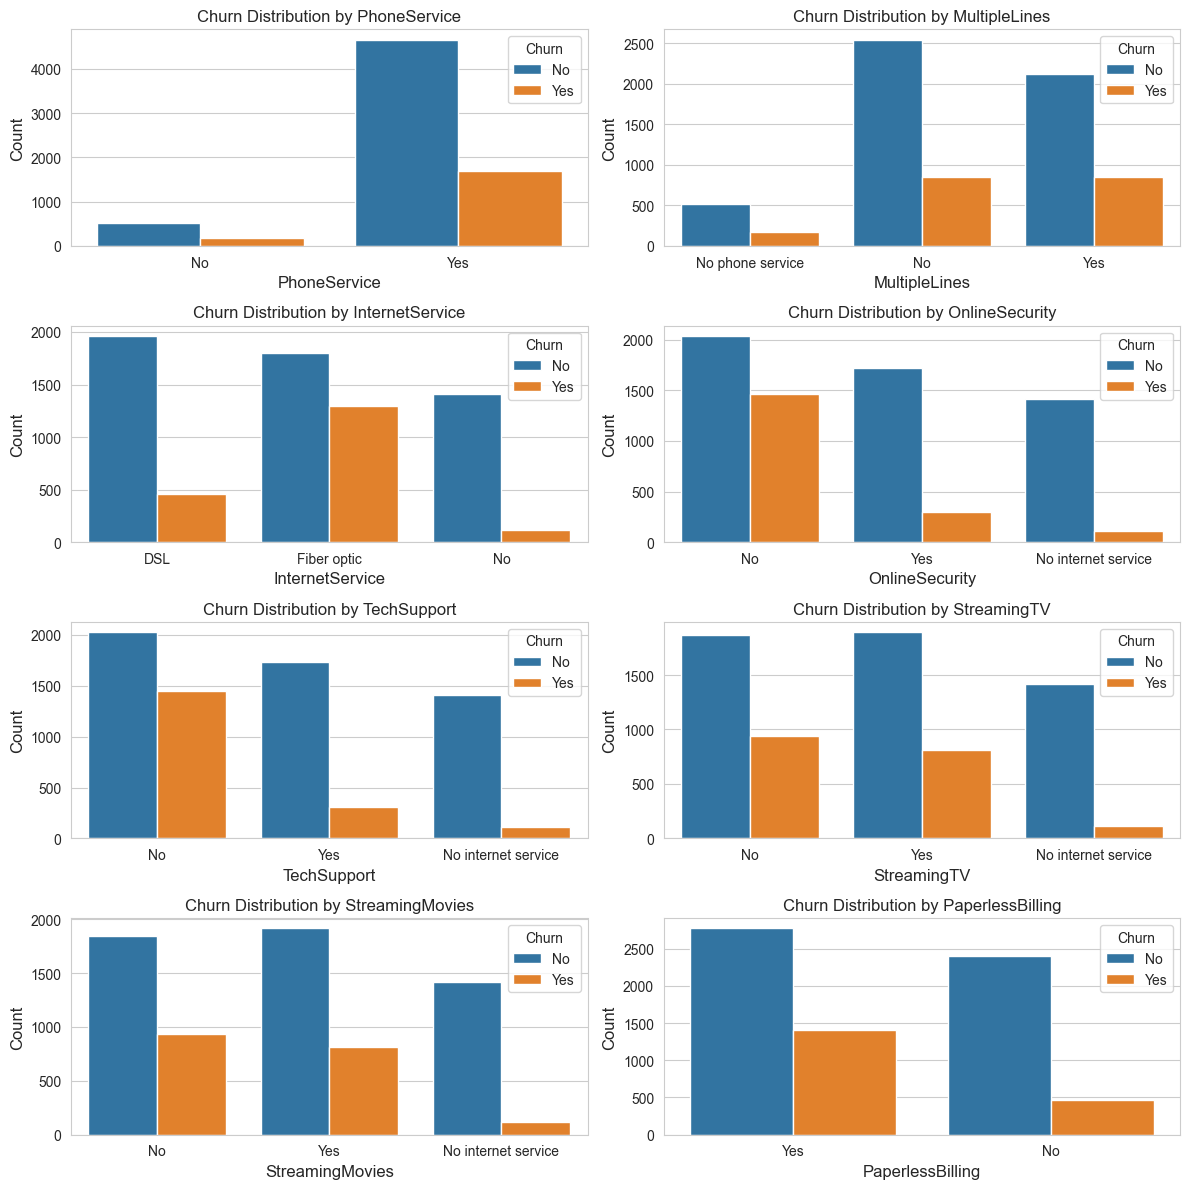

In [64]:
columns = ["PhoneService", "MultipleLines","InternetService","OnlineSecurity","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling"]
plot = 1
plt.figure(figsize=(12,12))
for col in columns:
    plt.subplot(4,2,plot)
    sns.countplot(data=customer_df, x=col, hue="Churn")
    plt.title(f"Churn Distribution by {col}")
    plt.ylabel(ylabel="Count", fontsize=12)
    plt.xlabel(xlabel=f"{col}", fontsize=12)
    plt.tight_layout()
    plot += 1